# GA Data Science 16 (DAT16) - Lab3
##Developing Mastery of Pandas, Numpy & Bokeh
####  

Justin Breucop (with parts from Craig Sakuma)

## Lab goals

- NumPy: Entering the Matrix
- Pandas: DataFrames as Bamboo
- Bokeh: Picture-Perfect Visuals

##NumPy
As we've seen in lecture, linear algebra is the branch of mathematics describing navigation between different vector spaces. This core concept is very important as a big piece of data cleansing is converting data into various formats and certain algorithms require data to be in a specific shape.

NumPy is a package designed to be used in scientific computing, and specifically around building N-dimensional array objects.

###Creating an array

In [4]:
import numpy as np
a = np.arange(25).reshape(5,5)
# arange(n) is a function that creates a 1 row array of integers of length n 
# reshape(M,N) is a method converts a list to a matrix of size MxN
# if you just have a, like below - that returns the matrix 
a

# s: make sure that when you reshape it, it all works in terms of ending up with 25. So 5x4 wouldn't work since that's only 25.
# s: the 2 numbers you reshape to must multiply out properly

a.reshape(5,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

We can convert from lists to arrays. Note however unlike lists, elements of an array all have to be of the same datatype.

In [6]:
alist = [[ 0,  1,  2,  3,  4],[ 5,  6,  7,  8,  9],[10, 11, 12, 13, 14],[15, 16, 17, 18, 19],[20, 21, 22, 23, 24]]
type(alist)

list

In [7]:
np.array(alist)

#this just lets us change the type from a list to an array

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [16]:
biga = 10*a
biga

# this is scalar multiplication here

array([[  0,  10,  20,  30,  40],
       [ 50,  60,  70,  80,  90],
       [100, 110, 120, 130, 140],
       [150, 160, 170, 180, 190],
       [200, 210, 220, 230, 240]])

In [14]:
# biga = a/10
# biga

In [24]:
# if we do mean without passing arguments --> gives average across the entire array
print biga.mean()

# this is taking an argument, but don't think of the 0 and 1 as numbers --> better to think of these as shorthand 
print biga.mean(0) #Average per column
print biga.mean(1) #average per row

print biga.sum(1)

# if we wanted to figure out what this format was
type(biga.mean(1))

120.0
[ 100.  110.  120.  130.  140.]
[  20.   70.  120.  170.  220.]
[ 100  350  600  850 1100]


numpy.ndarray

In [25]:
bigm = np.matrix(biga-20)
bigm

matrix([[-20, -10,   0,  10,  20],
        [ 30,  40,  50,  60,  70],
        [ 80,  90, 100, 110, 120],
        [130, 140, 150, 160, 170],
        [180, 190, 200, 210, 220]])

In [26]:
np.linalg.inv(bigm)

# here we're taking the inverse of what we had above
# we can't do this with biga
# array multiplication doesn't quite work out 

matrix([[ -5.82741163e+12,  -3.82630046e+13,   6.47978853e+13,
           8.50288992e+12,  -2.92103589e+13],
        [  1.03354093e+13,   4.66192930e+13,  -6.97823380e+13,
          -4.16348403e+13,   5.44624760e+13],
        [ -6.86095256e+13,   1.33700614e+14,  -7.97512434e+13,
           3.28387473e+13,  -1.81785922e+13],
        [  1.29522470e+14,  -2.54207088e+14,   1.09657960e+14,
           2.52154667e+13,  -1.01888078e+13],
        [ -6.54209419e+13,   1.12150186e+14,  -2.49222636e+13,
          -2.49222636e+13,   3.11528295e+12]])

####Slices

In [27]:
# this returns the first row of what we had earlier
bigm[0]

matrix([[-20, -10,   0,  10,  20]])

In [28]:
#Same thing, but demonstrating the full slice with a colon
bigm[0,:]

# if you don't pass a value to one of the columns - it'll assume you want everything 
# 0 refers to first row, second one refers to column

matrix([[-20, -10,   0,  10,  20]])

In [30]:
# this returns the 4th column, but keep in mind indexing, which makes this 3 in python (0,1,2,3)
bigm[:,3]

matrix([[ 10],
        [ 60],
        [110],
        [160],
        [210]])

Slice rules work for even more complex dimensional data

In [32]:
# arange(30)--> list of 30
# reshape --> note that the numbers all multiply out to 30
compm = np.arange(30).reshape(5,3,2)
compm

# you can give higher dimensions shapes


array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]],

       [[24, 25],
        [26, 27],
        [28, 29]]])

In [34]:
# lets describe it
# what's the shape like?
print compm.shape

# dimensions
print compm.ndim

# type of array
print compm.dtype

(5L, 3L, 2L)
3
int32


In [35]:
compm[3,:,1]

array([19, 21, 23])

In [36]:
compm[0,0,0]

# lets us select the first piece of data

0

In [37]:
compm[0,0,0] = 5.9
compm[0,0,0]

# note that you have to convert your data type for your array in order to integrate multiple data types
# here we get 5.9 because our number types are integers, not float. Note though that it didn't fail on us!

5

Numpy tries to resolve conflicting datatypes, sometimes to our dismay

In [38]:
# astype lets us change the type. note that this time it takes the value as we entered it
compm = compm.astype(float)
compm[0,0,0] = 5.75
compm[0,0,0]

5.75

####Random Numbers
Random numbers are very helpful and are necessary at times for testing data pipelines and running statistical analyses. Functions for creating random values are under numpy.random.

In [17]:
#Create a randomized array
# this returns matrix with dimensions that you've input
rm = np.random.rand(5,5)
rm

array([[ 0.79793963,  0.19169925,  0.18553429,  0.94138822,  0.75231437],
       [ 0.03926442,  0.13392731,  0.24757835,  0.50783883,  0.18192342],
       [ 0.17182207,  0.79160454,  0.34893924,  0.58246961,  0.44149973],
       [ 0.38525838,  0.58020591,  0.9376094 ,  0.39411364,  0.370136  ],
       [ 0.29596316,  0.76540939,  0.35168003,  0.80580028,  0.15312877]])

In [18]:
# you can ask for the shape - this is still an array like anything else
rm.shape

(5, 5)

In [19]:
# can ask for the mean - since it's a small matrix, has a pretty small mean....
print rm.mean()
print rm.mean(0) #Average per column
print rm.mean(1) #average per row

0.454201930301
[ 0.33804953  0.49256928  0.41426826  0.64632212  0.37980046]
[ 0.57377515  0.22210647  0.46726704  0.53346467  0.47439633]


In [41]:
# for a different Normal Distribution, use np.random.normal

# first number is the mean (average of the bell curve), second number is the standard deviation. the last set of numbers are the 
# dimensions of choice. 
rm = np.random.normal(5,9,(30,30))
rm

array([[ -4.12579239e+00,   9.16036787e+00,  -2.06230951e+00,
         -7.49717623e+00,   4.11742275e+00,   3.45502063e+00,
          1.42937304e+01,   3.42074083e+01,  -7.55180168e+00,
          9.55026409e+00,   4.86938559e+00,  -1.39189960e+00,
          5.32303627e+00,  -3.75732948e-01,   1.03267062e+01,
          1.08251728e+01,  -7.21135458e-01,   8.27753430e+00,
          1.33674412e+01,   1.19992314e+01,   1.51097651e+00,
          8.08577423e+00,   1.10290754e+01,   1.49013593e+01,
          1.11287094e+01,   1.23569907e+01,   6.02585356e+00,
          4.30033275e+00,   3.18334169e+00,  -5.95148033e+00],
       [  4.42082681e+00,  -2.94398872e+00,  -1.25660128e+01,
          5.65807680e+00,  -3.03974552e+00,  -1.80370378e+00,
          1.92467305e+01,   4.20041027e+00,   4.87726043e+00,
         -1.46440982e+00,   1.65830096e+01,   1.07872231e+00,
          8.13249541e+00,  -3.30632536e+00,   4.91386777e+00,
         -3.78159994e+00,   3.61975063e-02,   1.00552496e+01,
       

In [44]:
# this gives us the mean of the entire array
print rm.mean(), "which is hopefully close to the input mean"

print rm.var(), "which variance = stdev squared"

# this gives us the median 
print np.median(rm)


5.00410199439 which is hopefully close to the input mean
79.8612198288 which variance = stdev squared
5.07920505263


Find more distributions and random functions here: http://docs.scipy.org/doc/numpy/reference/routines.random.html

###Exercise 1
1) Create a 4x5 array of integers numbering 0 to 19.

In [55]:
# remember that if we want up to 19, we have to go one further --> 20

np.arange(20).reshape(4,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

2) Create a 50x500 array with a mean of 20 and variance of 100. Save it to a variable called  `biggie`

In [59]:
# note that we have to 

# remember the second number is standard dev! So we have to take the sq root of the variance.
biggie = np.random.normal(20,10,(50,500))
biggie
print biggie.shape
print biggie.mean()
print biggie.var()

(50L, 500L)
19.9212011914
98.4432544375


3) Change the mean of the array to a value within 1 of 0 and the variance within 1 of 25. Think about what the mean and the variance represent and try using various mathematical operations.

In [48]:
# REVIEW THIS AGAIN
# Subtract 20 to get the mean within 1 of 0, then divide by 2 --> because if you squared 2, that's 4. Taking that out, you get
# within 1 of 25. 
morph = (biggie - 20)/2
# 
print morph.mean()
# 
print morph.var()

1.18031448543
574.65747264


##Pandas: DataFrames as Bamboo
You've already been exposed to dataframes in the previous labs so lets get into dataframes and how we can work with them.

In [63]:
import pandas as pd

data = pd.read_csv("titanic-train.csv")
data.head()

'''data: they kept a log from the Titanic of who survived. There's a kaggle training set with this.


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-63-5761df524f3c>, line 6)

In [61]:
data.describe()

NameError: name 'data' is not defined

In [26]:
data[data.Age>65]

# boolean mask - want everything where passenger was older than 65
# 0 stands for dead, 1 means yes, they survived. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [27]:
data[(data.Age==11)&(data.SibSp==5)]

# logic combining these --> make sure that there's parentheses around your logical statements ot be evaluated together. 
# a lot of times, may need to look for specialists to make sure you understand what the columns of data refer to
# The | means or. Here, we have & --> and. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11,5,2,CA 2144,46.9,NaN,S


In [28]:
data[(data.Age==11)|(data.SibSp==5)]

# we did or here, so we got 8 
# we're not technically in python here, we're in a data frame 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11,5,2,CA 2144,46.9000,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16,5,2,CA 2144,46.9000,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1,5,2,CA 2144,46.9000,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9,5,2,CA 2144,46.9000,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11,4,2,347082,31.2750,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14,5,2,CA 2144,46.9000,NaN,S
731,732,0,3,"Hassan, Mr. Houssein G N",male,11,0,0,2699,18.7875,NaN,C
802,803,1,1,"Carter, Master. William Thornton II",male,11,1,2,113760,120.0000,B96 B98,S


###Cleaning Data

In [29]:
data.info()

# object as a data type is something to be wary of - it means pandas isn't sure and is just calling it an object. Strings
# often get translated or read as objects. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


####Working with nulls
Exclude data

In [60]:
# isn
data[data.Age.isnull()]
#data[data.Age.notnull()]

# if it's not random, that means that someone younger may be more likely not to have their ages recorded. 
# if drop it - don't have to worry about it. "big data" - this is a luxury that you CAN afford. if losing less than 5%, it's okay.

# amount of data you want for your algorithm depends on quality of data and amount of data you have. 

NameError: name 'data' is not defined

In [64]:
# You can also just replace the nulls
data.Age[data.Age.isnull()].fillna(0)

# if you just replaced with 0's, you'd throw off your descriptive stats --> mean, median, mode. You've essentially changed every stat value.
# there's some algorithms that aren't sensitive to statistics, but that's pretty rare

NameError: name 'data' is not defined

In [65]:
#Replace with the mean to preserve statistical values
avg_age = data.Age[data.Age.notnull()].mean()
avg_age
data.Age.fillna(avg_age)

# if you filled in with the average age --> could replace all the nulls with that instead. again though, changing stats of data.
# variance - measure of how much data varies on mean, so if you put a lot of it as mean.. shrinks your variance significantly
# if filled with normal distribution - wouldn't lose a lot
# if predicting on age, harder question
# with data sci, look @ large picture and make predictions based on other parameters. 
# algorithms can perform better when have larger window to work through and if statistically not changing, then it's okay
# this is a process of imputation - vet outcome variable with whether or not someone survived. if we see even distributions 
'''between the two types of groups, then that might be okay to replace with means bc there isn't something signif diff
between the two groups per se''''''

NameError: name 'data' is not defined

####Replace with random normal distribution

In [33]:
# Get values of mean and standard deviation
data.Age[data.Age.notnull()].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [34]:
# Replace null values with 

# inplace .... 

data.Age.fillna(np.random.normal(29.7,14.5),inplace=True)

In [35]:
data.Age.fillna(np.random.normal(29.7,14.5)).describe()

count    891.000000
mean      33.003232
std       14.599337
min        0.420000
25%       22.000000
50%       32.000000
75%       46.331692
max       80.000000
Name: Age, dtype: float64

###Convert categorical data to numerical

In [36]:
data.Sex=='female'

# 0, 1 is binary 
# say that data.Sex == female
# returns True / False 

0      False
1       True
2       True
3       True
4      False
5      False
6      False
7      False
8       True
9       True
10      True
11      True
12     False
13     False
14      True
15      True
16     False
17     False
18      True
19      True
20     False
21     False
22      True
23     False
24      True
25      True
26     False
27     False
28      True
29     False
       ...  
861    False
862     True
863     True
864    False
865     True
866     True
867    False
868    False
869    False
870    False
871     True
872    False
873    False
874     True
875     True
876    False
877    False
878    False
879     True
880     True
881    False
882     True
883    False
884    False
885     True
886    False
887     True
888     True
889    False
890    False
Name: Sex, dtype: bool

In [37]:
data.rename(columns={'Sex':'Is Female'},inplace=True)
data['Is Female']=data['Is Female']=='female'
data.head()

# by pulling this - can change the mask. this is a strategy you'll have to do. QUESTION: BETTER TO DO BOOLEAN OR DUMMY?

,PassengerId,Survived,Pclass,Name,Is Female,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",False,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",True,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",False,35,0,0,373450,8.0500,NaN,S


In [38]:
# get unique values of Embarked
data.Embarked.unique()

# could also have converted to a list and change it to a set to highlight unique values within that list 

array(['S', 'C', 'Q', nan], dtype=object)

In [39]:
# replace values with numbers
data.Embarked.replace(['S', 'C', 'Q'],[1,2,3],inplace=True)
data.head()

# instead of random strings, can work with numbers

,PassengerId,Survived,Pclass,Name,Is Female,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",False,22,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,38,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",True,26,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True,35,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",False,35,0,0,373450,8.0500,NaN,1


###Selecting with .loc, .iloc, & .ix

Selecting data in pandas can be tricky. The main takeaway is that .loc looks for index labels, .iloc looks for the integer index position, and .ix can be a mix. 

In [54]:
df = pd.DataFrame(np.random.randn(6,4),index=list('abcdef'),columns=list('ABCD'))
df

,A,B,C,D
a,0.188947,0.049304,0.200385,-0.136010
b,0.815933,-0.685627,0.023936,-1.256055
c,1.072943,-0.627140,-0.011910,1.486688
d,-0.289270,1.050645,-1.785554,0.856576
e,0.930137,0.141014,0.192557,-0.826248
f,0.652964,-1.912988,-1.599319,-1.480639


In [55]:
df.loc['f']

# this returns the entire f row and the corresponding column values

A    0.652964
B   -1.912988
C   -1.599319
D   -1.480639
Name: f, dtype: float64

In [59]:
df.iloc[len(df.index)-1]

# iloc looks @ raw position in the data frame
# here we find f again, but using a diff approach

A    0.652964
B   -1.912988
C   -1.599319
D   -1.480639
Name: f, dtype: float64

In [61]:
df.A.ix['f'] == df.A.ix[-1]

# can use ix with a label or an integer. be careful when using this - when pulling an index when mean to pull a label. 
# ix just does its best guess for this

# negative - goes to the end. so for instance: 
''' cookies --> -1 gives us s. -4 gives us k. 

True

###Group by

In [40]:
# Find average age of passengers that survived vs. died
data.groupby('Survived')['Age'].mean()

# average age for those who survived is 31, average age for those who didn't is 34. this gives you a good understanding of what's going on. 

Survived
0    34.202116
1    31.078708
Name: Age, dtype: float64

In [41]:
# Count number of female passengers
data.groupby('Is Female')['PassengerId'].count()

# also supports counting - most of passengers were male

Is Female
False    577
True     314
Name: PassengerId, dtype: int64

In [42]:
data.groupby(['Survived','Pclass'])['PassengerId'].count()

# multi grouping. pass them as list. pclass - economic standing. 

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: PassengerId, dtype: int64

###Apply

In [43]:
# Convert ticket prices to USD
data.Fare.apply(lambda x: x*1.6)

# apply takes for an argument called lambda - this lets you declare a function in place, then pass the argument for each row
# converting from pounds to USD here --> does it for each row and replaces 
# lambda is a keyword that python knows 

# the apply functoin allows you to do much more complex stuff

0       11.60000
1      114.05328
2       12.68000
3       84.96000
4       12.88000
5       13.53328
6       82.98000
7       33.72000
8       17.81328
9       48.11328
10      26.72000
11      42.48000
12      12.88000
13      50.04000
14      12.56672
15      25.60000
16      46.60000
17      20.80000
18      28.80000
19      11.56000
20      41.60000
21      20.80000
22      12.84672
23      56.80000
24      33.72000
25      50.22000
26      11.56000
27     420.80000
28      12.60672
29      12.63328
         ...    
861     18.40000
862     41.48672
863    111.28000
864     20.80000
865     20.80000
866     22.17328
867     80.79328
868     15.20000
869     17.81328
870     12.63328
871     84.08672
872      8.00000
873     14.40000
874     38.40000
875     11.56000
876     15.75328
877     12.63328
878     12.63328
879    133.05328
880     41.60000
881     12.63328
882     16.82672
883     16.80000
884     11.28000
885     46.60000
886     20.80000
887     48.00000
888     37.520

In [44]:
data.Name.apply(lambda x:x.split(",")[0])

# let's say we think there's something valuable - there's probably something important here in the last names. 
# this allows us to split and extract the first part of the name in the variable
# split is a delimiter 

0               Braund
1              Cumings
2            Heikkinen
3             Futrelle
4                Allen
5                Moran
6             McCarthy
7              Palsson
8              Johnson
9               Nasser
10           Sandstrom
11             Bonnell
12         Saundercock
13           Andersson
14             Vestrom
15             Hewlett
16                Rice
17            Williams
18       Vander Planke
19          Masselmani
20              Fynney
21             Beesley
22             McGowan
23              Sloper
24             Palsson
25             Asplund
26                Emir
27             Fortune
28             O'Dwyer
29            Todoroff
            ...       
861              Giles
862              Swift
863               Sage
864               Gill
865            Bystrom
866       Duran y More
867           Roebling
868      van Melkebeke
869            Johnson
870             Balkic
871           Beckwith
872           Carlsson
873    Vand

###Concatenate

In [45]:
data_first_half = data.iloc[0:10,:]
data_first_half.info()

# just a way to combine two data frames together

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 12 columns):
PassengerId    10 non-null int64
Survived       10 non-null int64
Pclass         10 non-null int64
Name           10 non-null object
Is Female      10 non-null bool
Age            10 non-null float64
SibSp          10 non-null int64
Parch          10 non-null int64
Ticket         10 non-null object
Fare           10 non-null float64
Cabin          3 non-null object
Embarked       10 non-null float64
dtypes: bool(1), float64(3), int64(5), object(3)
memory usage: 970.0+ bytes


In [46]:
data_second_half = data.iloc[10:,:]

# below we give a list of data to put together - as long as same shape and such, can combine 
remake_data = pd.concat([data_first_half,data_second_half])
remake_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Is Female      891 non-null bool
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null float64
dtypes: bool(1), float64(3), int64(5), object(3)
memory usage: 84.4+ KB


###EXERCISE 2
1) Replace Pclass numbers with 'First Class', 'Second Class', 'Third Class'

2) What was the average ticket price for survivors vs. dead passengers?

###Bonus!!!
Round all ages to the nearest year using `apply`

##Bokeh: Picture Perfect Visuals

To install Bokeh, go to a terminal and type:

`conda install bokeh` 

Bokeh is built by the same people that created Anaconda (Continuum Analytics) and is designed out of the box for web display, making it nice for creating presentation ready, interactive visuals quickly. Labs in this course will be shown in Bokeh. Checkout http://bokeh.pydata.org/en/latest/docs/quickstart.html#concepts to see some of the range of capabilities.


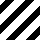
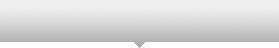
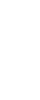
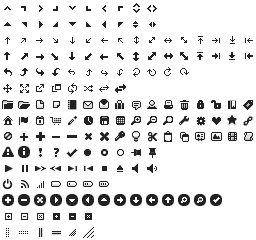
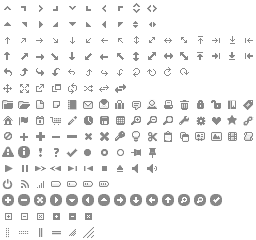
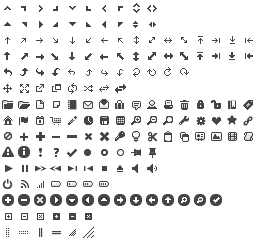
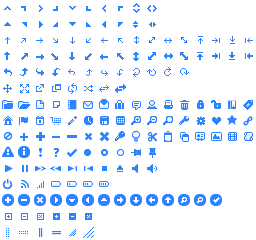
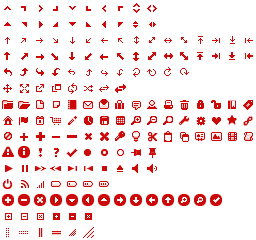
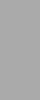
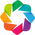
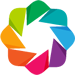
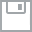
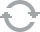
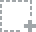
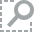
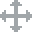
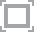
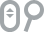

In [66]:
# bokeh is a higher level version of matplotlib that lets you do visualizations

from bokeh.plotting import figure, output_notebook,show,vplot
output_notebook()



In [67]:
import pandas.io.data
import datetime
aapl = pd.io.data.get_data_yahoo('FB', 
                                 start=datetime.datetime(2015, 4, 1), 
                                 end=datetime.datetime(2015, 4, 28))

# bokeh structures everything as figures and gluphs

NameError: name 'pd' is not defined

In [49]:
# prepare some data
x = aapl.Low
y = aapl.High

# create a new plot with a title and axis labels
p = figure(title="Stock High vs. Low", x_axis_label='Low', y_axis_label='High')

# These are glyphs
p.circle(x, y)
p.line(x,x*y.mean()/x.mean())

# show the results
show(p)

# first build your plot, then your glyphs. you can size your glyphs, make different shapes (e.g., circles)

# you can zoom in and out, save it

At its core, Bokeh is built up with Plots and Glyphs. Plots are created with the figure keyword and then glyphs are visuals that are added to the visualization. The visuals are scalable, interactive and savable. You can even create vectorized colors.

In [68]:
# prepare some data
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 150) for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]
# this line above changes the colors

TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(0,100), y_range=(0,100))

# add a circle renderer with vecorized colors and sizes
p.circle(x,y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

# show the results
show(p)

# actually changing the color for the dataset as wego through it 

In [69]:
p1 = figure(title="Titanic Ages Dead",x_axis_label = 'Age',y_axis_label = 'Count')
#construct the histogram
hist, edges = np.histogram(data.Age[data.Survived==0].values, density=True, bins=50)
#Construct your x axis
x = np.linspace(data.Age.min(),data.Age.max(),100)
#add the bars, scaling the value to the full count of people
p1.quad(top=hist*len(data.Age), bottom=0, left=edges[:-1], right=edges[1:],line_color='black')
#scaled the top [above] to be # data pieces i have, bottom is set to 0. line color is black, so everything in black box.

p2 = figure(title="Titanic Ages Survived",x_axis_label = 'Age',y_axis_label = 'Count')

# only thing diff below is survived==1. 
hist, edges = np.histogram(data.Age[data.Survived==1].values, density=True, bins=50)
x = np.linspace(data.Age.min(),data.Age.max(),100)
p2.quad(top=hist*len(data.Age), bottom=0, left=edges[:-1], right=edges[1:],line_color='black')

# this yields a histogram 

show(vplot(p1,p2))

NameError: name 'data' is not defined